In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
!mkdir data
!cd data && wget "http://164.68.116.174:5000/download/files/isep/a3/deep-learning/respiratory-sound/extracted_features.npy"
!cd data && wget "http://164.68.116.174:5000/download/files/isep/a3/deep-learning/respiratory-sound/labels.npy"
!cd data && wget "http://164.68.116.174:5000/download/files/isep/a3/deep-learning/respiratory-sound/features_stretched.npy"
!cd data && wget "http://164.68.116.174:5000/download/files/isep/a3/deep-learning/respiratory-sound/labels_stretched.npy"

--2020-12-21 22:47:17--  http://164.68.116.174:5000/download/files/isep/a3/deep-learning/respiratory-sound/extracted_features.npy
Connecting to 164.68.116.174:5000... connected.
HTTP request sent, awaiting response... 200 OK
Length: 126886528 (121M) [application/octet-stream]
Saving to: ‘extracted_features.npy’

extracted_features. 100%[===================>] 121.01M  9.73MB/s    in 15s     

2020-12-21 22:47:33 (8.06 MB/s) - ‘extracted_features.npy’ saved [126886528/126886528]

--2020-12-21 22:47:33--  http://164.68.116.174:5000/download/files/isep/a3/deep-learning/respiratory-sound/labels.npy
Connecting to 164.68.116.174:5000... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51648 (50K) [application/octet-stream]
Saving to: ‘labels.npy’

labels.npy          100%[===================>]  50.44K  92.9KB/s    in 0.5s    

2020-12-21 22:47:34 (92.9 KB/s) - ‘labels.npy’ saved [51648/51648]

--2020-12-21 22:47:34--  http://164.68.116.174:5000/download/files/isep/a3/deep-lea

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa.display

In [ ]:
features = np.load('./data/extracted_features.npy')
labels = np.load('./data/labels.npy')

features_stretched = np.load('./data/features_stretched.npy')
labels_stretched = np.load('./data/labels_stretched.npy')
features_stretched = np.delete(features_stretched, np.where((labels_stretched == 'COPD'))[0], axis=0) 
labels_stretched = np.delete(labels_stretched, np.where((labels_stretched == 'COPD'))[0], axis=0) 

# features = np.concatenate((features, features_stretched), axis=0) -- y a un pb de dimensions revoir le script du time stretching
tot_labels = np.concatenate((labels,labels_stretched), axis=0)

In [ ]:
pd.Series(labels).value_counts()

COPD              793
Pneumonia          37
Healthy            35
URTI               23
Bronchiectasis     16
Bronchiolitis      13
LRTI                2
Asthma              1
dtype: int64

In [ ]:
pd.Series(tot_labels).value_counts()

COPD              793
Pneumonia         185
Healthy           175
URTI              115
Bronchiectasis     80
Bronchiolitis      65
LRTI               10
Asthma              5
dtype: int64

In [ ]:
features1 = np.delete(features, np.where((labels == 'Asthma') | (labels == 'LRTI'))[0], axis=0) 
labels1 = np.delete(labels, np.where((labels == 'Asthma') | (labels == 'LRTI'))[0], axis=0)

In [ ]:
features1.shape

(917, 40, 862)

In [ ]:
pd.Series(labels1).value_counts()

COPD              793
Pneumonia          37
Healthy            35
URTI               23
Bronchiectasis     16
Bronchiolitis      13
dtype: int64

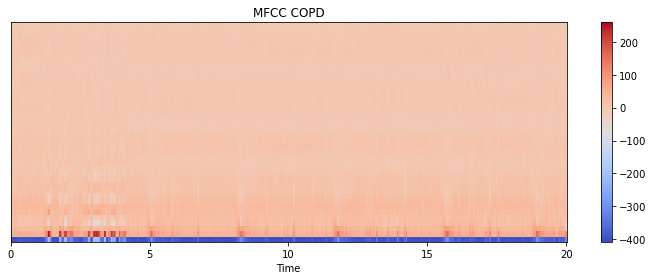

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(features[7], x_axis='time')
plt.colorbar()
plt.title('MFCC ' + labels[7])
plt.tight_layout()
plt.show()